In [168]:
import numpy as np 
import matplotlib.pyplot as plt
import random

# 2D projection

In [169]:
# defining the number of steps (!= number of points you will have in the end)
n0 = 20
n = n0
# maximum number of attempt to find a stable structures
max_attempt = 100
str_attempt = 0
stable = False

while not stable and str_attempt < max_attempt:
    n = n0 # reset number of steps
    str_attempt += 1
    # random walk trajectory
    traj_xy = np.zeros((n,2))

    # compute RW steps
    for i in range(1, n):
        test_xyz = traj_xy[i - 1]
        attempt = 0
        # self-avoiding random walk
        while np.min(np.linalg.norm(traj_xy-test_xyz, axis=1)) == 0 and attempt<max_attempt:
            attempt += 1
            val = random.randint(1, 4)
            test_xyz = traj_xy[i - 1].copy()

            if val == 1:
                test_xyz[0] = traj_xy[i - 1, 0] + 1
                test_xyz[1] = traj_xy[i - 1, 1] 
            elif val == 2:
                test_xyz[0] = traj_xy[i - 1, 0] 
                test_xyz[1] = traj_xy[i - 1, 1] + 1
            elif val == 3:
                test_xyz[0] = traj_xy[i - 1, 0] - 1
                test_xyz[1] = traj_xy[i - 1, 1] 
            else:
                test_xyz[0] = traj_xy[i - 1, 0] 
                test_xyz[1] = traj_xy[i - 1, 1] - 1
        traj_xy[i] = test_xyz
    # shift to 0 height
    traj_xy[:,1] -= np.min(traj_xy[:,1])
    # delete overlapping points
    traj_xy = np.unique(traj_xy, axis=0)
    n = traj_xy.shape[0]
    
    # prune loose ends
    connect = []
    connect_ids = []
    # loop over points
    for i in range(len(traj_xy)):
        for j in range(len(traj_xy)):
            if i == j: continue # no self link
            # check if two points are closer
            dist = np.linalg.norm(traj_xy[i]-traj_xy[j])
            if np.isclose(dist-1,0):
                connect.append([traj_xy[i], traj_xy[j]])
                connect_ids.append([i, j])
    connect = np.array(connect)
    connect_ids = np.array(connect_ids)
    # compute nearest neighbours
    ids, id_counts = np.unique(connect_ids[:,0], return_counts=True)

    # iteratively delete nodes with only 1 neighbour
    ii = 0
    while np.any(id_counts<=1):
        print(f'\t{ii}) lose ends?', np.any(id_counts<=1))
        ii+=1
        ids, id_counts = np.unique(connect_ids[:,0], return_counts=True)
        # update trajectory
        traj_xy = traj_xy[ids[id_counts>1]]
        traj_xy[:,1] -= np.min(traj_xy[:,1])
        traj_xy = np.unique(traj_xy, axis=0)
        n = traj_xy.shape[0]
        # recompute connectivity
        connect = []
        connect_ids = []
        for i in range(len(traj_xy)):
            for j in range(len(traj_xy)):
                if i == j: continue
                dist = np.linalg.norm(traj_xy[i]-traj_xy[j])

                if np.isclose(dist-1,0):
                    connect.append([traj_xy[i], traj_xy[j]])
                    connect_ids.append([i, j])
        connect = np.array(connect)
        connect_ids = np.array(connect_ids)

    # center of mass (only of points, while weight is probabl more in lines)
    xcm = np.mean(traj_xy, axis=0)
    # identify base
    base_mask = np.where(traj_xy[:,1] == np.min(traj_xy[:,1]))
    base_mask, traj_xy[base_mask]
    # compute stability
    stable = xcm[0] > np.min(traj_xy[base_mask, 0]) and xcm[0]<np.max(traj_xy[base_mask, 0])
    
    print(f'{str_attempt}) n={n} stable?', stable)

	0) lose ends? True
	1) lose ends? True
	2) lose ends? True
	3) lose ends? True
	4) lose ends? True
	5) lose ends? True
	6) lose ends? True
	7) lose ends? True
	8) lose ends? True
	9) lose ends? True
1) n=11 stable? True


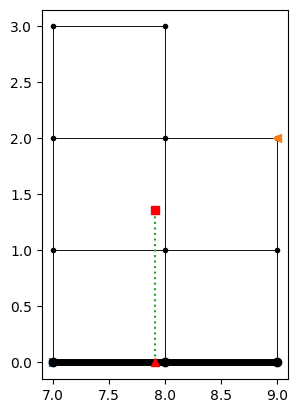

In [170]:
# interactive (works bad)
# %matplotlib notebook 
# static
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

for line in connect:
    ax.plot(line[:,0], line[:,1], '-k', lw=0.5)
    
ax.plot(traj_xy[:,0], traj_xy[:,1], '.k')
ax.plot(traj_xy[np.argmin(traj_xy[:,1]),0], traj_xy[np.argmin(traj_xy[:,1]),1], '>')
ax.plot(traj_xy[-1,0], traj_xy[-1,1], '<')


ax.plot(traj_xy[base_mask, 0], traj_xy[base_mask, 1], 'ok', lw=5)
ax.plot([np.min(traj_xy[base_mask, 0]), np.max(traj_xy[base_mask, 0])], 
        2*[np.min(traj_xy[base_mask, 1])], '-k', lw=5, zorder=-1)

ax.plot([xcm[0], xcm[0]], [0, xcm[1]], ':')
ax.plot(xcm[0], xcm[1], 'sr')
ax.plot(xcm[0], 0, '^r')

ax.set_aspect('equal')
plt.show()


### make 3D

In [171]:
# make 3D by addin a layer behind

N = traj_xy.shape[0]*2
traj_xyz = np.zeros((N, 3))

traj_xyz[:N//2,0] = traj_xy[:,0]
traj_xyz[N//2:,0] = traj_xy[:,0]

traj_xyz[:N//2,2] = traj_xy[:,1]
traj_xyz[N//2:,2] = traj_xy[:,1]

traj_xyz[:N//2,1] = 0
traj_xyz[N//2:,1] = 1

connect = []
connect_ids = []
for i in range(len(traj_xyz)):
    for j in range(len(traj_xyz)):
        if i == j: continue
        dist = np.linalg.norm(traj_xyz[i]-traj_xyz[j])
        if np.isclose(dist-1,0):
            connect.append([traj_xyz[i], traj_xyz[j]])
            connect_ids.append([i, j])
connect = np.array(connect)
connect_ids = np.array(connect_ids)

xcm = np.mean(traj_xyz, axis=0)
base_mask = np.where(traj_xyz[:,2] == np.min(traj_xyz[:,2]))[0]
body_mask = [i for i in range(traj_xyz.shape[0]) if i not in base_mask]

print(connect.shape)

(82, 2, 3)


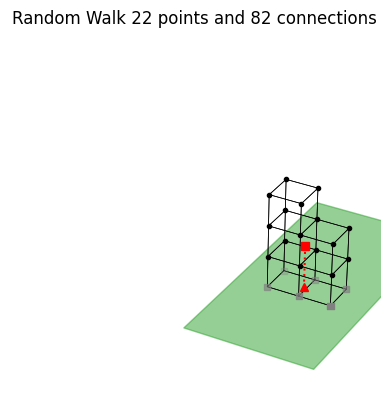

In [172]:
# %matplotlib notebook
%matplotlib inline

# plotting stuff:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

plt.title(f"Random Walk {N} points and {connect.shape[0]} connections")

# add a green carpet to understand better the 3D view
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
x = [np.min(traj_xyz[:,0])-1, np.max(traj_xyz[:,0])+1,np.max(traj_xyz[:,0])+1,np.min(traj_xyz[:,0])-1]
y = [-3,-3,5,5]
z = [0,0,0,0]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, zorder=-20, alpha=0.5, color='tab:green'))

# plot points
ax.plot3D(traj_xyz[body_mask,0], traj_xyz[body_mask,1], traj_xyz[body_mask,2], '.k')
# plot lines
for line in connect:
    ax.plot3D(line[:,0], line[:,1], line[:,2], '-k', lw=0.5)
    
# show CM
ax.plot3D([xcm[0], xcm[0]], [xcm[1], xcm[1]], [0, xcm[2]], ':r')
ax.plot3D(xcm[0], xcm[1], xcm[2], 'sr')
ax.plot3D(xcm[0], xcm[1], 0, '^r')

# highlight base
ax.scatter3D(traj_xyz[base_mask, 0], traj_xyz[base_mask, 1], traj_xyz[base_mask, 2], marker='s', color='gray', zorder=10)

# nice view
ax.set_aspect('equal')
ax.axis('off')

plt.show()
